# Diabetes Prediction Analysis  

## Research Question 
**How do glucose levels and BMI influence the likelihood of developing diabetes?**  




In [15]:
import pandas as pd

# Load the dataset (replace 'filename.csv' with your actual file)
df = pd.read_csv("diabetes.csv")

# Display first few rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
import pandas as pd

# Load the dataset (replace 'filename.csv' with your actual file name)
df = pd.read_csv("diabetes.csv")

# Display basic information
df.info()

# Show first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Check for missing values
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.describe()###insights into numerical columns like mean,min,max,std deviation etc




,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.dropna(inplace=True)


In [8]:
df.fillna(df.mean(), inplace=True)


In [9]:
df.duplicated().sum()  # Check for duplicate rows
df.drop_duplicates(inplace=True)  # Remove duplicates


In [11]:
### EDA######
import matplotlib.pyplot as plt
import seaborn as sns


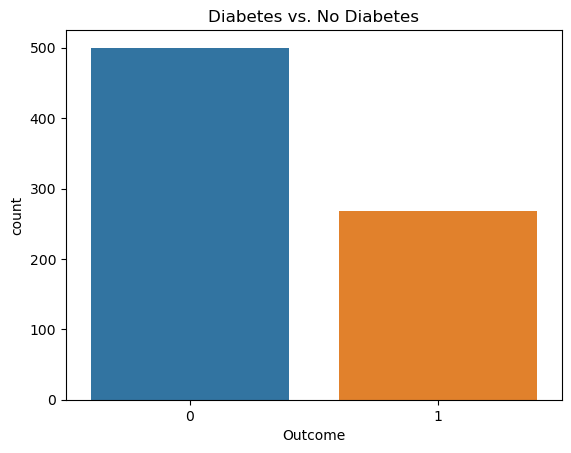

In [12]:
sns.countplot(x='Outcome', data=df) #visualize class distribution(diabetes vs no diabetes)
plt.title("Diabetes vs. No Diabetes")
plt.show()


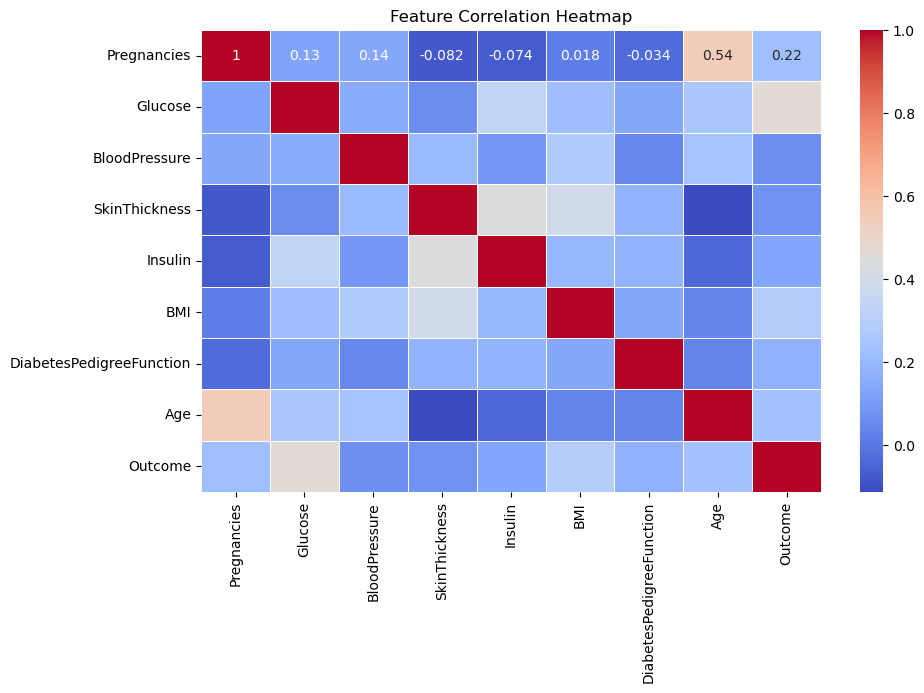

In [13]:
#corelation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


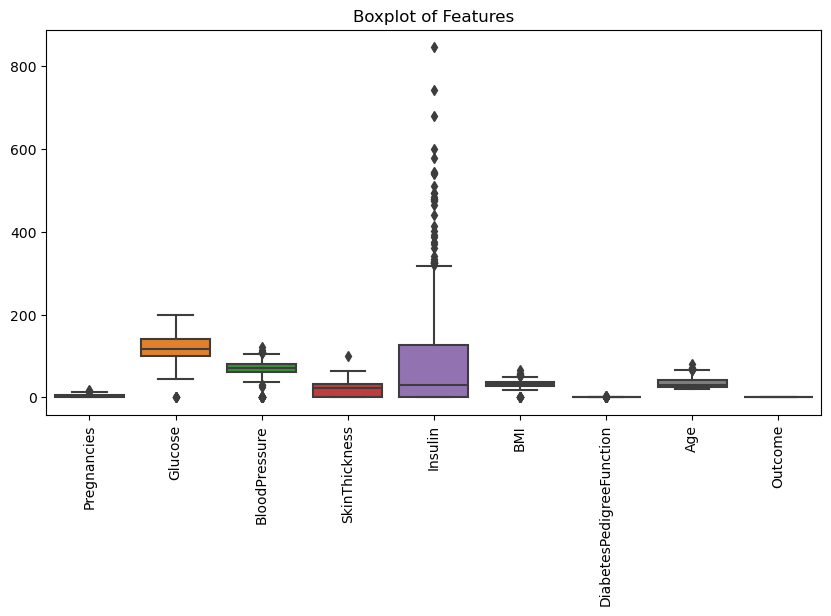

In [14]:
##Boxplots to check outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot of Features")
plt.show()


In [17]:
##Advanced data analysis
df[["Glucose", "BMI", "Outcome"]].describe()


,Glucose,BMI,Outcome
count,768.000000,768.000000,768.000000
mean,120.894531,31.992578,0.348958
std,31.972618,7.884160,0.476951
min,0.000000,0.000000,0.000000
25%,99.000000,27.300000,0.000000
50%,117.000000,32.000000,0.000000
75%,140.250000,36.600000,1.000000
max,199.000000,67.100000,1.000000


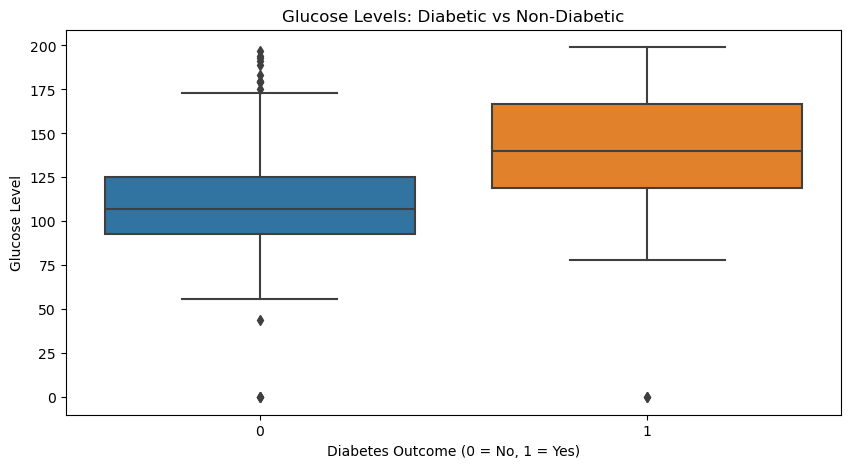

In [19]:
##Glucose vs Diabetes
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Outcome"], y=df["Glucose"])
plt.title("Glucose Levels: Diabetic vs Non-Diabetic")
plt.xlabel("Diabetes Outcome (0 = No, 1 = Yes)")
plt.ylabel("Glucose Level")
plt.show()


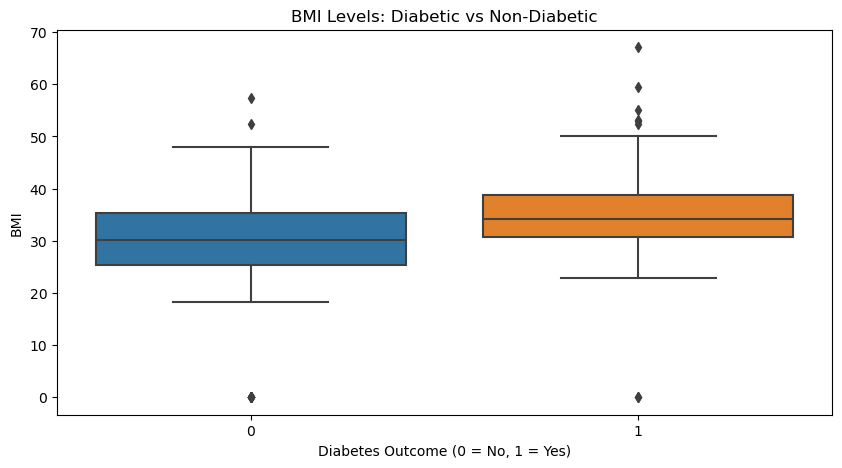

In [22]:
##BMI vs Diabtes
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Outcome"], y=df["BMI"])
plt.title("BMI Levels: Diabetic vs Non-Diabetic")
plt.xlabel("Diabetes Outcome (0 = No, 1 = Yes)")
plt.ylabel("BMI")
plt.show()




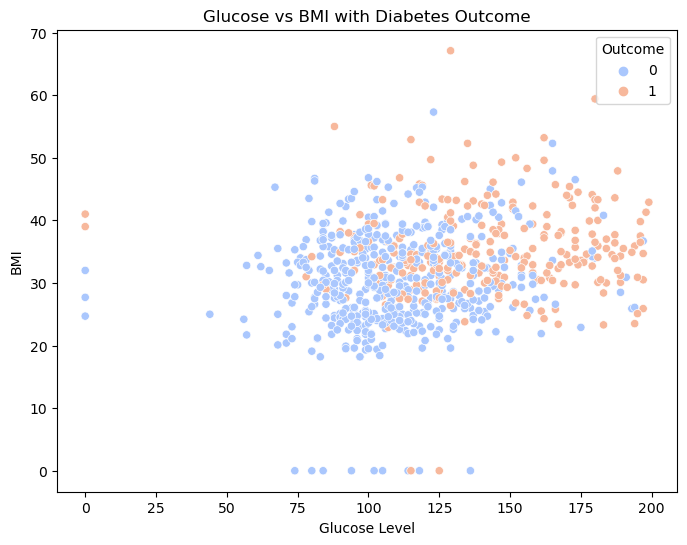

In [23]:
##Glucose vs BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Glucose"], y=df["BMI"], hue=df["Outcome"], palette="coolwarm")
plt.title("Glucose vs BMI with Diabetes Outcome")
plt.xlabel("Glucose Level")
plt.ylabel("BMI")
plt.show()


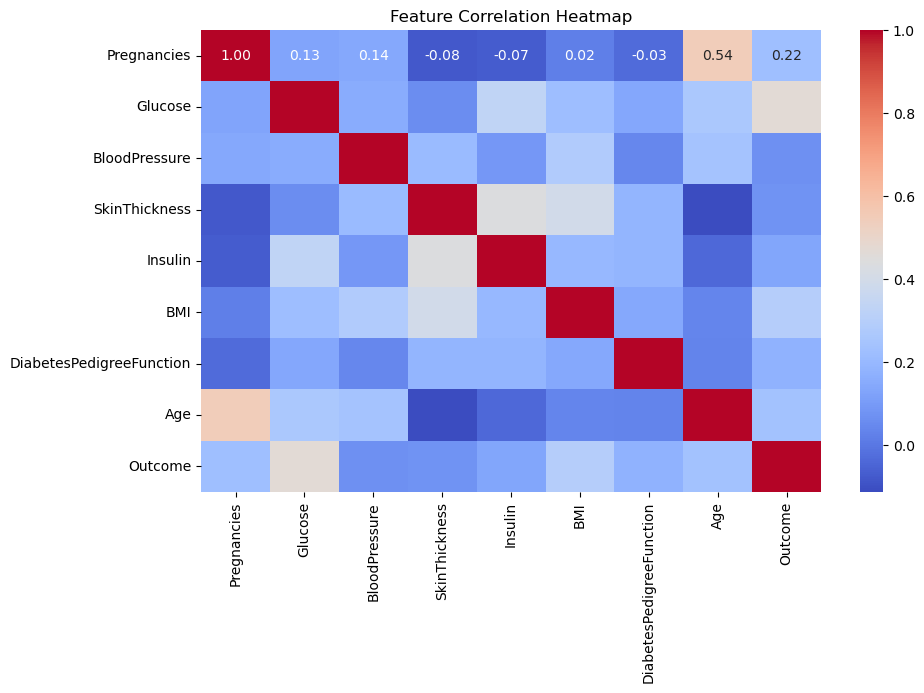

In [24]:
##corelation analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [25]:
###Predictive modelling with logidtic regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [26]:
X = df.drop(columns=['Outcome'])  # Drop the target variable
y = df['Outcome']  # Target variable (0 = No Diabetes, 1 = Diabetes)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [29]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [31]:
y_pred = model.predict(X_test)##predictions


In [32]:
accuracy = accuracy_score(y_test, y_pred)##evaluate model
print(f'Accuracy: {accuracy:.2f}')

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.75
Confusion Matrix:
[[79 20]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

